In [1]:
# remove this
import sys
#sys.path.append("/Users/harrison37/Work/alpine/ascent/install-debug/python-modules/")
sys.path.append("/Users/larsen30/research/test_builds/release/ascent/install/python-modules")

In [2]:
# cleanup any old results
!./cleanup.sh

In [3]:
# ascent + conduit imports
import conduit
import conduit.blueprint
import ascent

import numpy as np

# Jupyter imports
from IPython.display import Image
# helper we use when displaying results in the notebook
img_display_width = 500

## Create an example mesh to feed to Ascent

In [4]:
# create example mesh using the conduit blueprint braid helper
mesh = conduit.Node()
conduit.blueprint.mesh.examples.braid("hexs",
                                      10,
                                      10,
                                      10,
                                      mesh)

In [5]:
# make sure the mesh we created conforms to the blueprint
verify_info = conduit.Node()
if not conduit.blueprint.mesh.verify(mesh,verify_info):
    print("Mesh Verify failed!")
    print(verify_info)
else:
    print("Mesh verify success!")

Mesh verify success!


# Pipeline Example 1: Create and render a Contour

In [6]:
# create an instance of Ascent
a = ascent.Ascent()
a.open()

# publish our mesh to ascent
a.publish(mesh);


# Create a simple pipeline with a contour filter
pipelines = conduit.Node()
pipelines["pl1/f1/type"] = "contour"

contour_params = conduit.Node()
contour_params["field"] = "braid"
iso_vals = np.array([0.2, 0.4],dtype=np.float32)
contour_params["iso_values"].set_external(iso_vals)
pipelines["pl1/f1/params"] = contour_params

# setup actions to add the pipeline with our contour filter
# and feed that into a plot for raytracing
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_pipelines"
add_act["pipelines"] = pipelines

# declare a scene to render the dataset
scenes = conduit.Node()
scenes["s1/plots/p1/type"] = "pseudocolor";
scenes["s1/plots/p1/pipeline"] = "pl1";
scenes["s1/plots/p1/field"] = "braid";
# set the output file name (ascent will add ".png")
scenes["s1/image_name"] = "out_pipeline_ex1_contour"

add_act2 = actions.append()
add_act2["action"] = "add_scenes"
add_act2["scenes"] = scenes

# print our full actions tree
print(actions.to_yaml())

# execute
a.execute(actions);

# close ascent
a.close()


- 
  action: "add_pipelines"
  pipelines: 
    pl1: 
      f1: 
        type: "contour"
        params: 
          field: "braid"
          iso_values: [0.200000002980232, 0.400000005960464]
- 
  action: "add_scenes"
  scenes: 
    s1: 
      plots: 
        p1: 
          type: "pseudocolor"
          pipeline: "pl1"
          field: "braid"
      image_name: "out_pipeline_ex1_contour"



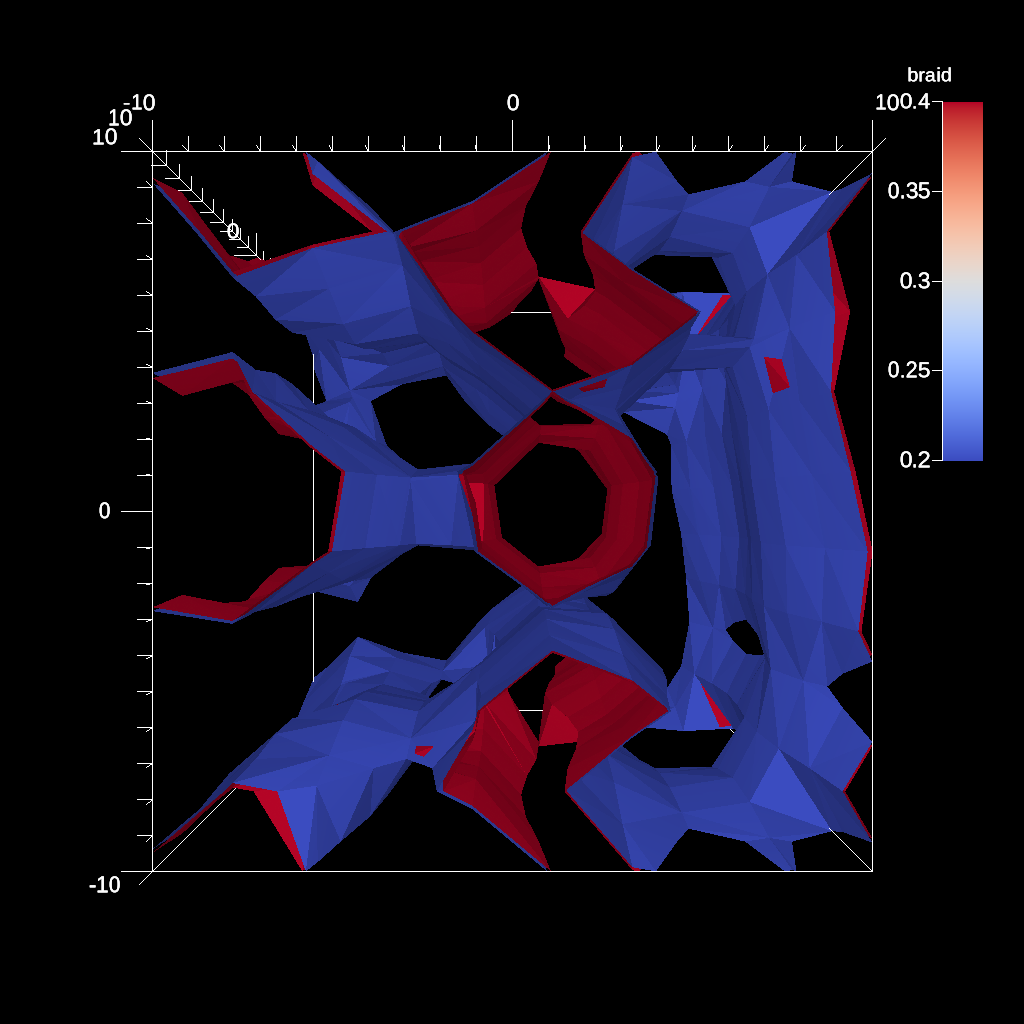

In [7]:
# show the resulting image
Image("out_pipeline_ex1_contour.png",width=img_display_width)

# Pipeline Example 2:  Clip and Threshold

In [8]:
a = ascent.Ascent()
a.open()

# publish mesh to ascent
a.publish(mesh);

pipelines = conduit.Node()
# pipeline 
pipelines["pl1/f1/type"] = "threshold"
# filter parameters
thresh_params = conduit.Node()
thresh_params["field"]  = "braid"
thresh_params["min_value"] = 0.0
thresh_params["max_value"] = 0.5
pipelines["pl1/f1/params"] = thresh_params

pipelines["pl1/f2/type"]   = "clip"
# filter parameters
clip_params = conduit.Node()
clip_params["sphere/center/x"] = 0.0
clip_params["sphere/center/y"] = 0.0
clip_params["sphere/center/z"] = 0.0
clip_params["sphere/radius"]   = 12
pipelines["pl1/f2/params/"] = clip_params

# setup actions
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_pipelines"
add_act["pipelines"] = pipelines

# declare a scene to render the dataset
scenes = conduit.Node()
scenes["s1/plots/p1/type"] = "pseudocolor"
scenes["s1/plots/p1/pipeline"] = "pl1"
scenes["s1/plots/p1/field"] = "braid"
# set the output file name (ascent will add ".png")
scenes["s1/image_name"] = "out_pipeline_ex2_thresh_clip"

add_act2 = actions.append()
add_act2["action"] = "add_scenes"
add_act2["scenes"] = scenes

# print our full actions tree
print(actions.to_yaml())

# execute
a.execute(actions)

# close ascent
a.close()


- 
  action: "add_pipelines"
  pipelines: 
    pl1: 
      f1: 
        type: "threshold"
        params: 
          field: "braid"
          min_value: 0.0
          max_value: 0.5
      f2: 
        type: "clip"
        params: 
          sphere: 
            center: 
              x: 0.0
              y: 0.0
              z: 0.0
            radius: 12
- 
  action: "add_scenes"
  scenes: 
    s1: 
      plots: 
        p1: 
          type: "pseudocolor"
          pipeline: "pl1"
          field: "braid"
      image_name: "out_pipeline_ex2_thresh_clip"



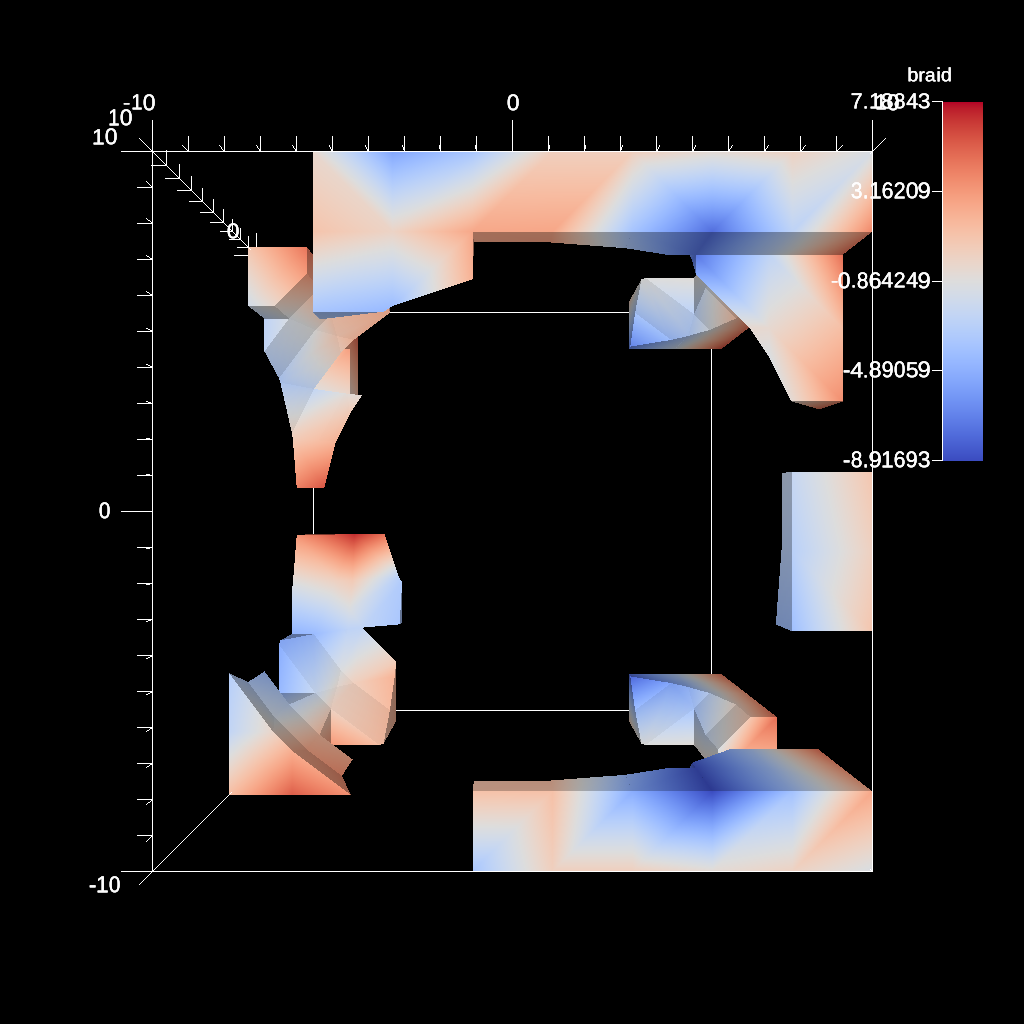

In [9]:
# show the resulting image
Image("out_pipeline_ex2_thresh_clip.png",width=img_display_width)

# Example 3: Render two plots from different pipelines

In [10]:
a = ascent.Ascent()
a.open()

# publish mesh to ascent
a.publish(mesh);

pipelines = conduit.Node()

# pipeline 1
pipelines["pl1/f1/type"] = "contour";
contour_params =conduit.Node()
contour_params["field"] = "braid";
iso_vals = np.array([0.2, 0.4], dtype=np.float64) 
contour_params["iso_values"].set_external(iso_vals);
pipelines["pl1/f1/params"] = contour_params;

# pipeline 2
thresh_params = conduit.Node()
pipelines["pl2/f1/type"] = "threshold"
thresh_params["field"]  = "braid"
thresh_params["min_value"] = 0.0
thresh_params["max_value"] = 0.5
pipelines["pl2/f1/params"] = thresh_params

pipelines["pl2/f2/type"]   = "clip"
clip_params = conduit.Node()
clip_params["sphere/center/x"] = 0.0
clip_params["sphere/center/y"] = 0.0
clip_params["sphere/center/z"] = 0.0
clip_params["sphere/radius"]   = 12
pipelines["pl2/f2/params/"] = clip_params

# setup actions
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_pipelines"
add_act["pipelines"] = pipelines

# declare a scene to render the dataset
scenes = conduit.Node()
scenes["s1/plots/p1/type"] = "pseudocolor"
scenes["s1/plots/p1/pipeline"] = "pl1"
scenes["s1/plots/p1/field"] = "braid"
scenes["s1/plots/p2/type"] = "pseudocolor"
scenes["s1/plots/p2/pipeline"] = "pl2"
scenes["s1/plots/p2/field"] = "braid"
# set the output file name (ascent will add ".png")
scenes["s1/image_name"] = "out_pipeline_ex3_two_plots";

add_act2 = actions.append()
add_act2["action"] = "add_scenes"
add_act2["scenes"] = scenes

# print our full actions tree
print(actions.to_yaml())

# execute
a.execute(actions)

# close ascent
a.close()


- 
  action: "add_pipelines"
  pipelines: 
    pl1: 
      f1: 
        type: "contour"
        params: 
          field: "braid"
          iso_values: [0.2, 0.4]
    pl2: 
      f1: 
        type: "threshold"
        params: 
          field: "braid"
          min_value: 0.0
          max_value: 0.5
      f2: 
        type: "clip"
        params: 
          sphere: 
            center: 
              x: 0.0
              y: 0.0
              z: 0.0
            radius: 12
- 
  action: "add_scenes"
  scenes: 
    s1: 
      plots: 
        p1: 
          type: "pseudocolor"
          pipeline: "pl1"
          field: "braid"
        p2: 
          type: "pseudocolor"
          pipeline: "pl2"
          field: "braid"
      image_name: "out_pipeline_ex3_two_plots"



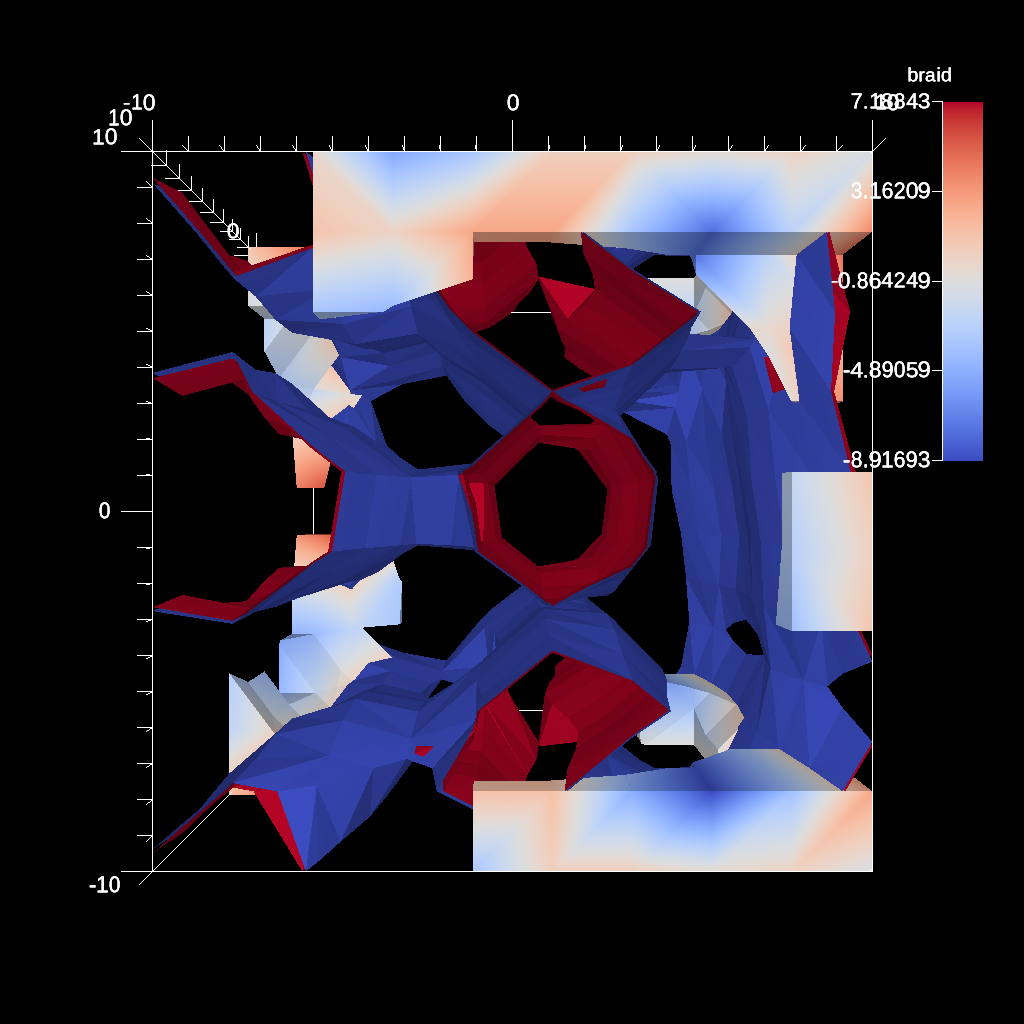

In [11]:
# show the resulting image
Image("out_pipeline_ex3_two_plots.png",width=img_display_width)